In [6]:
import numpy as np
from matplotlib import pyplot as plt
from joblib import Parallel, delayed
from tqdm import tqdm
from scipy.stats import chi2, norm

import pingouin as pg
from gpy_test import GPY
from lrv_test.types import real_function

from data_generation.arma import generate_arma_sample, generate_arma_covariance_matrix
from scipy.linalg import sqrtm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")

In [10]:
# Define once properties of the arma process to generate
N, M = 1000, 300
ar, ma = 0.1, 0.5

# Define the function / frequencies to test
fs = [lambda x: (x - 1) ** 2]

is_complex_gaussian = True

# Define the number of repetitions
n_repeat = 1000

# Limit distribution check

In [11]:
def run(
    fs: list[real_function],
    N: int,
    M: int,
    ar: float,
    ma: float,
    is_complex_gaussian: bool,
):
    y = generate_arma_sample(N, M, ar, ma, is_complex_gaussian=is_complex_gaussian)
    return GPY(y, fs, is_complex_gaussian=is_complex_gaussian)

In [12]:
results = Parallel(n_jobs=-1)(
    delayed(run)(fs, N, M, ar, ma, is_complex_gaussian)
    for _ in tqdm(range(n_repeat), total=n_repeat)
)

100%|██████████| 1000/1000 [00:50<00:00, 19.76it/s]


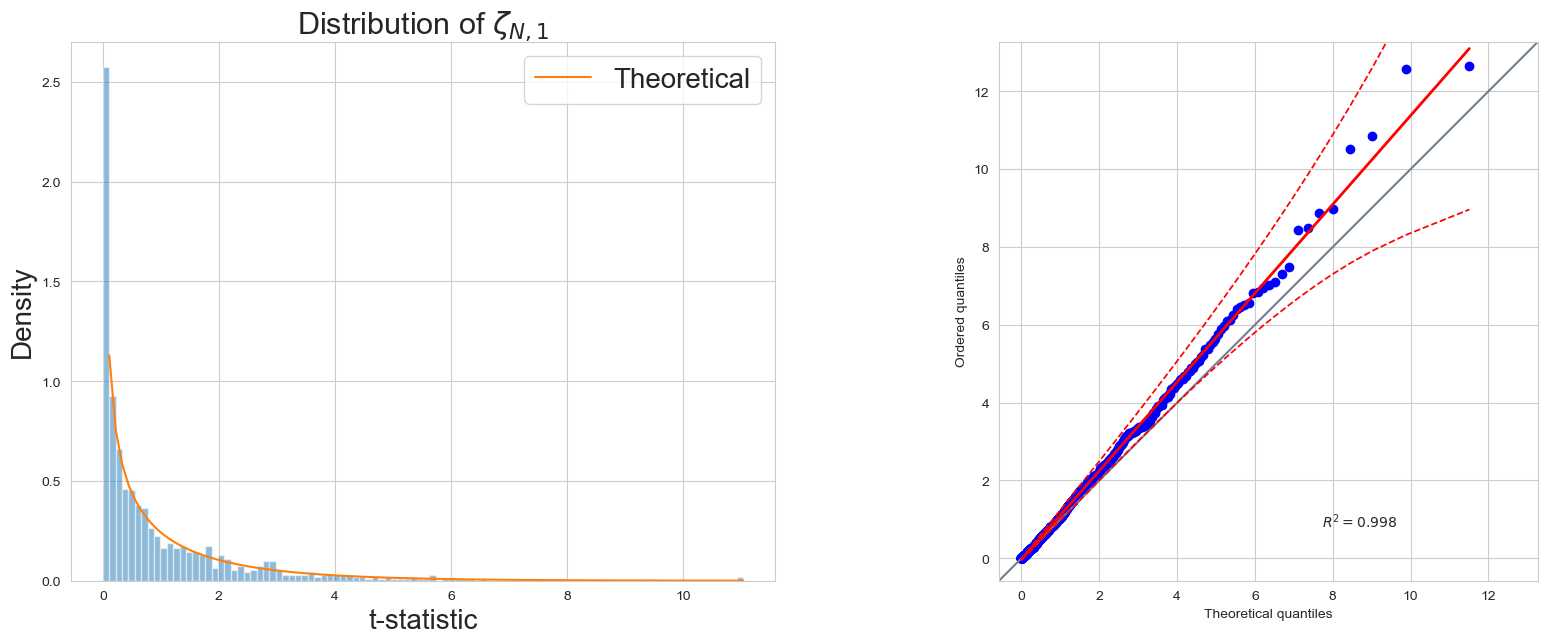

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(2 * 10, 7))

# plot distribution of t_stat_1
ax = axs[0]
all_t_stat = np.array([r.test_statistic for r in results])
ax.hist(all_t_stat, bins=100, density=True, alpha=0.5)
x_range = np.linspace(0, np.max(all_t_stat), 100)
ax.plot(x_range, chi2.pdf(x_range, df=len(fs)), label="Theoretical")
ax.legend(fontsize=20)
ax.set_title(r"Distribution of $\zeta_{N, 1}$", fontsize=22)
ax.set_xlabel("t-statistic", fontsize=20)
ax.set_ylabel("Density", fontsize=20)

ax = axs[1]
ax = pg.qqplot(all_t_stat, dist="chi2", sparams=(len(fs),), ax=ax)

In [14]:
def run(
    fs,
    N,
    M,
    time_ar,
    time_ma,
    space_ar_1,
    space_ar_2,
    space_ma_1,
    space_ma_2,
    is_complex_gaussian,
):
    y = generate_arma_sample(
        N,
        M,
        time_ar,
        time_ma,
        is_complex_gaussian,
    )
    # Cov_1 = generate_arma_covariance_matrix(M // 2, space_ar_1, space_ma_1)
    # Cov_2 = generate_arma_covariance_matrix(M - M // 2, space_ar_2, space_ma_2)
    # Cov = np.block(
    #     [
    #         [Cov_1, np.zeros((M // 2, M - M // 2))],
    #         [np.zeros((M - M // 2, M // 2)), Cov_2],
    #     ]
    # )
    Cov = generate_arma_covariance_matrix(M, space_ar_1, space_ma_1)
    y = y @ sqrtm(Cov)

    return GPY(y, fs, is_complex_gaussian=is_complex_gaussian)

In [15]:
space_ar_1, space_ma_1 = 0.1, 0.8
space_ar_2, space_ma_2 = 0.1, 0.8

results = Parallel(n_jobs=-1)(
    delayed(run)(
        fs,
        N,
        M,
        ar,
        ma,
        space_ar_1,
        space_ar_2,
        space_ma_1,
        space_ma_2,
        is_complex_gaussian,
    )
    for _ in tqdm(range(n_repeat), total=n_repeat)
)

100%|██████████| 1000/1000 [01:17<00:00, 12.92it/s]


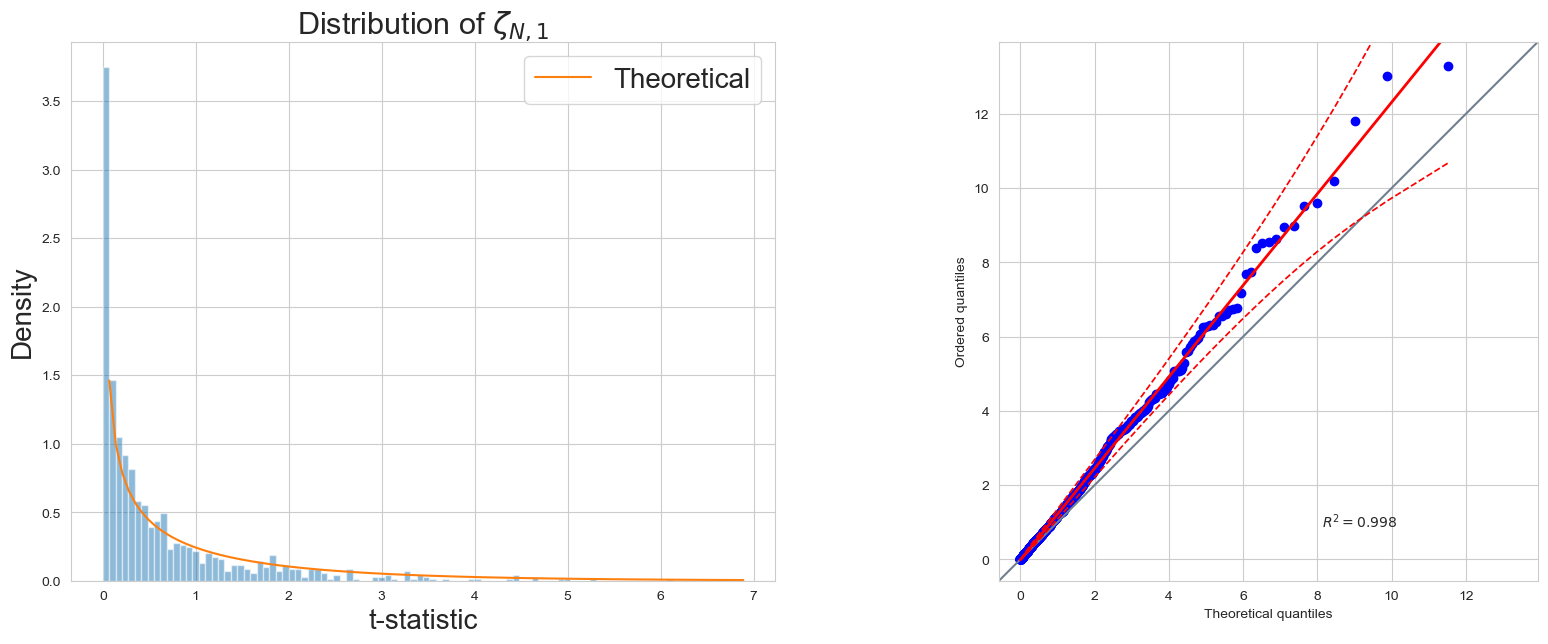

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(2 * 10, 7))

# plot distribution of t_stat_1
ax = axs[0]
all_t_stat = np.array([r.test_statistic for r in results])
ax.hist(all_t_stat, bins=100, density=True, alpha=0.5)
x_range = np.linspace(0, np.max(all_t_stat), 100)
ax.plot(x_range, chi2.pdf(x_range, df=len(fs)), label="Theoretical")
ax.legend(fontsize=20)
ax.set_title(r"Distribution of $\zeta_{N, 1}$", fontsize=22)
ax.set_xlabel("t-statistic", fontsize=20)
ax.set_ylabel("Density", fontsize=20)

ax = axs[1]
# probplot(
#     all_t_stat,
#     dist=chi2,
#     sparams=(len(fs),),
#     plot=ax,
#     # marker="o",
#     # markerfacecolor="tab:blue",
#     # markeredgecolor="tab:blue",
#     # label="Estimated",
# )
# ax.set_title(r"QQ plot of $\zeta_{N, 1}$", fontsize=22)
# ax.set_xlabel("Theoretical quantiles", fontsize=20)
# ax.set_ylabel("Sample quantiles", fontsize=20)
# ax.legend(fontsize=20)


ax = pg.qqplot(all_t_stat, dist="chi2", sparams=(len(fs),), ax=ax)

In [17]:
space_ar_1, space_ma_1 = 0.1, 0.8
space_ar_2, space_ma_2 = -0.1, -0.8

results = Parallel(n_jobs=-1)(
    delayed(run)(
        fs,
        N,
        M,
        ar,
        ma,
        space_ar_1,
        space_ar_2,
        space_ma_1,
        space_ma_2,
        is_complex_gaussian,
    )
    for _ in tqdm(range(n_repeat), total=n_repeat)
)

100%|██████████| 1000/1000 [01:29<00:00, 11.18it/s]


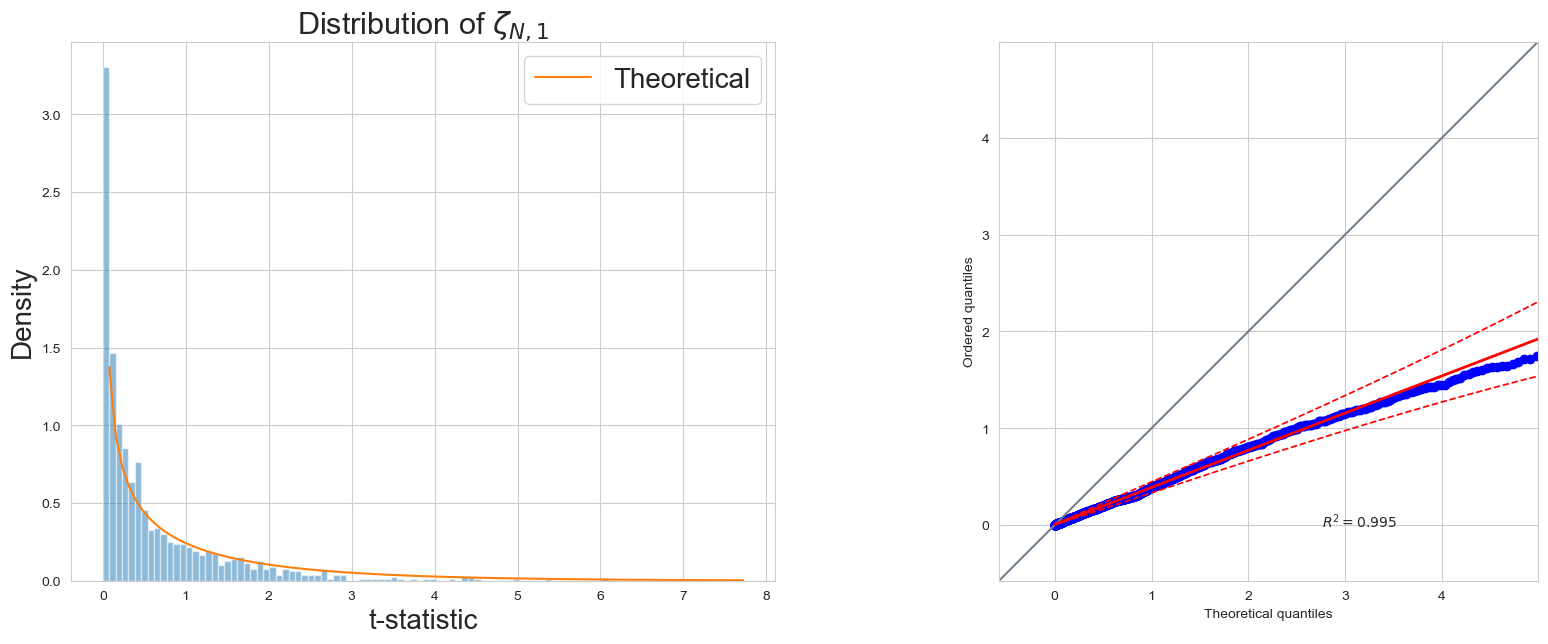

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(2 * 10, 7))

# plot distribution of t_stat_1
ax = axs[0]
all_t_stat = np.array([r.test_statistic for r in results])
ax.hist(all_t_stat, bins=100, density=True, alpha=0.5)
x_range = np.linspace(0, np.max(all_t_stat), 100)
ax.plot(x_range, chi2.pdf(x_range, df=len(fs)), label="Theoretical")
ax.legend(fontsize=20)
ax.set_title(r"Distribution of $\zeta_{N, 1}$", fontsize=22)
ax.set_xlabel("t-statistic", fontsize=20)
ax.set_ylabel("Density", fontsize=20)

ax = axs[1]
# probplot(
#     all_t_stat,
#     dist=chi2,
#     sparams=(len(fs),),
#     plot=ax,
#     # marker="o",
#     # markerfacecolor="tab:blue",
#     # markeredgecolor="tab:blue",
#     # label="Estimated",
# )
# ax.set_title(r"QQ plot of $\zeta_{N, 1}$", fontsize=22)
# ax.set_xlabel("Theoretical quantiles", fontsize=20)
# ax.set_ylabel("Sample quantiles", fontsize=20)
# ax.legend(fontsize=20)


ax = pg.qqplot(all_t_stat, dist="chi2", sparams=(len(fs),), ax=ax)